#Load Data


**Read Data**

In [2]:
!git clone https://github.com/VinAIResearch/PhoNER_COVID19

Cloning into 'PhoNER_COVID19'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 44 (delta 14), reused 30 (delta 12), pack-reused 0
Unpacking objects: 100% (44/44), done.


In [3]:
import pandas as pd

In [4]:
df_train = []
i = 1
for line in open("/content/PhoNER_COVID19/data/word/train_word.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_train.append(tmp)

df_dev = []
i = 1
for line in open("/content/PhoNER_COVID19/data/word/dev_word.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_dev.append(tmp)

df_test= []
i = 1
for line in open("/content/PhoNER_COVID19/data/word/test_word.conll", "r").readlines():
  if len(line.split())<2:
    i+=1
  else:
    tmp = line.split()
    tmp.append('s'+str(i))
    df_test.append(tmp)

In [5]:
data_train = pd.DataFrame(df_train, columns =['Word', 'Tag', 'Sentence#'])
data_dev = pd.DataFrame(df_dev, columns =['Word', 'Tag', 'Sentence#'])
data_test = pd.DataFrame(df_test, columns =['Word', 'Tag', 'Sentence#'])
# df = pd.DataFrame(df, columns =['Word', 'Tag', 'Sentence#'])

In [6]:
data_train['Word'].unique().shape

(5241,)

In [7]:
data_train.groupby(['Tag']).count()['Word']

Tag
B-AGE                       682
B-DATE                     2549
B-GENDER                    542
B-JOB                       205
B-LOCATION                 5398
B-NAME                      349
B-ORGANIZATION             1137
B-PATIENT_ID               3240
B-SYMPTOM_AND_DISEASE      1439
B-TRANSPORTATION            226
I-AGE                         2
I-DATE                     2500
I-JOB                        62
I-LOCATION                 5242
I-NAME                       13
I-ORGANIZATION             2545
I-PATIENT_ID                 11
I-SYMPTOM_AND_DISEASE      1552
I-TRANSPORTATION             67
O                        104750
Name: Word, dtype: int64

In [8]:
len(pd.concat([data_train, data_dev, data_test])['Word'].unique())

8101

In [9]:
def concatWord(data):
  tuple_func = lambda f: [(w, t) for w, t in zip(f['Word'].values, f['Tag'].values)]
  sentences_with_tag = data.groupby('Sentence#').apply(tuple_func)
  print(sentences_with_tag)
  sentences_with_tag = [sent for sent in sentences_with_tag]
  return sentences_with_tag

sentences_with_tag_train=concatWord(data_train)
sentences_with_tag_dev=concatWord(data_dev)
sentences_with_tag_test=concatWord(data_test)

Sentence#
s1       [(Đồng_thời, O), (,, O), (bệnh_viện, O), (tiếp...
s10      [(Chiều, O), (22, B-DATE), (-, I-DATE), (4, I-...
s100     [(5, O), (người, O), (tiếp_xúc, O), (gần, O), ...
s1000    [(Đây, O), (là, O), (bệnh_nhân, O), (cuối_cùng...
s1001    [(Các, O), (mẫu, O), (bệnh_phẩm, O), (gửi, O),...
                               ...                        
s995     [(Theo, O), (ông, O), (Nguyễn_Trọng_Diện, O), ...
s996     [(Một, O), (ca, O), (mắc, O), (COVID, O), (-, ...
s997     [(Tuy_nhiên, O), (sau_này, O), (mới, O), (phát...
s998     [(Nếu, O), (đây, O), (là, O), (nguồn, O), (lây...
s999     [(Người, O), (đàn_ông, O), (42, B-AGE), (tuổi,...
Length: 5027, dtype: object
Sentence#
s1       [(Bác_sĩ, O), (Nguyễn_Trung_Nguyên, O), (,, O)...
s10      [(Hệ_miễn_dịch, B-SYMPTOM_AND_DISEASE), (suy_y...
s100     [(Bốn, O), (bác_sĩ, O), (,, O), (kỹ_thuật_viên...
s1000    [(Anh, O), (được, O), (làm, O), (liên_tiếp, O)...
s1001    [(Ca, O), (bệnh, O), (161, B-PATIENT_ID), ((, ...
        

In [10]:
sentences_train = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_train]
sentences_dev = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_dev]
sentences_test = [' '.join([word[0] for word in sent]) for sent in sentences_with_tag_test]
sentences_test[1]

'Theo đó bệnh_nhân tên N.M.C. , là nhân_viên ngân_hàng tại 38 Hàng Da , phường Hàng Bông , quận Hoàn_Kiếm .'

In [11]:
labels_train = [[word[1] for word in sent] for sent in sentences_with_tag_train]
labels_dev = [[word[1] for word in sent] for sent in sentences_with_tag_dev]
labels_test = [[word[1] for word in sent] for sent in sentences_with_tag_test]

In [12]:
# Augmentation
! pip install neraug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.4 MB/s 
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=559c73955c716ac6218d90cd2500122652ebc74d60b337680ed242e56e7485ee
  Stored in directory: /root/.cache/pip/wheels/05/96/ee/7cac4e74f3b19e3158dce26a20a1c86b3533c43ec72a549fd7
Successfully built seqeval


In [13]:
from neraug.augmentator import LabelWiseTokenReplacement
from neraug.augmentator import MentionReplacement
from neraug.augmentator import ShuffleWithinSegment

from neraug.scheme import IOBES

In [14]:
from neraug.augmentator import (
    DictionaryReplacement,
    LabelWiseTokenReplacement,
    MentionReplacement,
    ShuffleWithinSegment,
)
from neraug.scheme import IOBES


def test_mention_replacement(x_train, y_train, x, y, n):
    # x_train = [["I", "went", "to0", "Osaka"], ["Aaka"], ["3","2",'BLUT']]
    # y_train = [["O", "O", "S-me", "I-LOuuC"], ["I-LOuuC"], ['O','O',"I-LOuuC"]]
    augmentator = MentionReplacement(x_train, y_train, IOBES)
    # n = 3
    # x = ["I", "went", "to", "Tokyo"]
    # y = ["O", "O", "S-me", "S-LOuuC"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)

    return x_augs, y_augs


def test_label_with_replacement(x_train, y_train, x, y, n):
    # x_train = [["I"]]
    # y_train = [["O"]]
    augmentator = LabelWiseTokenReplacement(x_train, y_train, p=0.1)
    # n = 3
    # x = ["I", "went"]
    # y = ["O", "O"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)
    # print(x_augs, y_augs)
    return x_augs, y_augs


def test_shuffle_replacement(x, y):
    augmentator = ShuffleWithinSegment(IOBES, p=1)
    n =1
    # x = ["I"]
    # y = ["O", "O", "O", "LOC"]
    x_augs, y_augs = augmentator.augment(x, y, n=n)
    # print(x_augs, y_augs)
    return x_augs, y_augs


In [15]:
# test_label_with_replacement()

# Data Augmentation

In [16]:
# listTag=['B-ORGANIZATION', 'I-ORGANIZATION', 'B-SYMPTOM_AND_DISEASE', 'I-SYMPTOM_AND_DISEASE', 'B-LOCATION',
# 'B-DATE', 'B-PATIENT_ID', 'B-AGE', 'B-NAME', 'I-DATE', 'B-JOB', 'I-LOCATION', 'B-TRANSPORTATION', 'B-GENDER', 
# 'I-TRANSPORTATION', 'I-JOB', 'I-NAME', 'I-AGE', 'I-PATIENT_ID',]
listTag=['B-NAME', 'B-GENDER', 'B-AGE',
        #  'I-TRANSPORTATION',
         ]
x_train=[[] for i in range(len(listTag))]
y_train=[[] for i in range(len(listTag))]
for j, tag in enumerate(listTag):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train[j].append(sentences_train[i].split())
        y_train[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))

listTag2=['B-ORGANIZATION', 'B-SYMPTOM_AND_DISEASE',
          'B-TRANSPORTATION', 'B-JOB',
          # 'I-ORGANIZATION',
          # 'I-SYMPTOM_AND_DISEASE',
          ]
x_train2=[[] for i in range(len(listTag2))]
y_train2=[[] for i in range(len(listTag2))]
for j, tag in enumerate(listTag2):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train2[j].append(sentences_train[i].split())
        y_train2[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))

listTag3=['B-DATE', 'B-LOCATION', 'B-PATIENT_ID',
          # 'I-DATE', 'I-LOCATION', 
          # 'I-ORGANIZATION', 
          ]
x_train3=[[] for i in range(len(listTag3))]
y_train3=[[] for i in range(len(listTag3))]
for j, tag in enumerate(listTag3):
  for i in range(len(sentences_train)):
    if tag in labels_train[i]:
      if len(sentences_train[i].split()) == len(labels_train[i]):
        x_train3[j].append(sentences_train[i].split())
        y_train3[j].append(list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i])))



In [17]:
import random

augmentation_sentences = []
augmentation_labels = []
for j, tag in enumerate(listTag):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<1:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train[j], y_train[j], 
                                    sentences_train[i].split(), S_label, 15)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences.append(" ".join(x[k]))
          augmentation_labels.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
#################################

augmentation_sentences2 = []
augmentation_labels2 = []
for j, tag in enumerate(listTag2):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<1:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train2[j], y_train2[j], 
                                    sentences_train[i].split(), S_label, 35)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences2.append(" ".join(x[k]))
          augmentation_labels2.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
#######################################
augmentation_sentences3 = []
augmentation_labels3 = []
for j, tag in enumerate(listTag3):
  for i in range(len(sentences_train)):
    if tag in labels_train[i] and random.random()<0.15:
      S_label=list(map(lambda x: x.replace(tag, "S"+tag[1:]), labels_train[i]))
      x, y=test_mention_replacement(x_train3[j], y_train3[j], 
                                    sentences_train[i].split(), S_label, 10)
      # x, y = test_shuffle_replacement(sentences_train[i].split(), S_label)
      for k in range(len(x)):
          augmentation_sentences3 .append(" ".join(x[k]))
          augmentation_labels3.append(list(map(lambda x: x.replace("S"+tag[1:], tag), y[k])))
      
      

In [18]:
print(len(augmentation_sentences), len(augmentation_sentences2), len(augmentation_sentences3))
print(len(augmentation_labels), len(augmentation_labels2), len(augmentation_labels3))
sentences_train += augmentation_sentences + augmentation_sentences2 + augmentation_sentences3
labels_train += augmentation_labels + augmentation_labels2 + augmentation_labels3

21030 70315 10050
21030 70315 10050


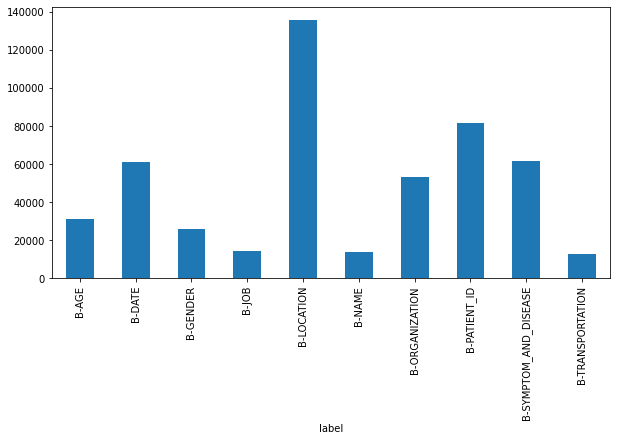

In [19]:
import numpy as np
from operator import add
from functools import reduce

x=np.array([x for xs in labels_train for x in xs])
df = pd.DataFrame({'label': x})
x=df[df['label'].str[0]=='B'].groupby(['label'])['label'].count()
x.plot(kind='bar', figsize=(10,5), legend=False)

In [20]:
label2idx = {k: v for v, k in enumerate(data_train.Tag.unique())}
ids_to_labels = {v: k for v, k in enumerate(data_train.Tag.unique())}
label2idx['PAD']=20
label2idx['[CLS]']=21
label2idx['[SEP]']=22
label2idx['X']=23
ids_to_labels[20]='PAD'
ids_to_labels[21]='[CLS]'
ids_to_labels[22]='[SEP]'
ids_to_labels[23]='X'

In [21]:
ids_to_labels

{0: 'O',
 1: 'B-ORGANIZATION',
 2: 'I-ORGANIZATION',
 3: 'B-SYMPTOM_AND_DISEASE',
 4: 'I-SYMPTOM_AND_DISEASE',
 5: 'B-LOCATION',
 6: 'B-DATE',
 7: 'B-PATIENT_ID',
 8: 'B-AGE',
 9: 'B-NAME',
 10: 'I-DATE',
 11: 'B-JOB',
 12: 'I-LOCATION',
 13: 'B-TRANSPORTATION',
 14: 'B-GENDER',
 15: 'I-TRANSPORTATION',
 16: 'I-JOB',
 17: 'I-NAME',
 18: 'I-AGE',
 19: 'I-PATIENT_ID',
 20: 'PAD',
 21: '[CLS]',
 22: '[SEP]',
 23: 'X'}

In [22]:
labels_value = ['PAD', '[CLS]', '[SEP]', 'X']+data_train.Tag.unique().tolist()

In [23]:
labels_value

['PAD',
 '[CLS]',
 '[SEP]',
 'X',
 'O',
 'B-ORGANIZATION',
 'I-ORGANIZATION',
 'B-SYMPTOM_AND_DISEASE',
 'I-SYMPTOM_AND_DISEASE',
 'B-LOCATION',
 'B-DATE',
 'B-PATIENT_ID',
 'B-AGE',
 'B-NAME',
 'I-DATE',
 'B-JOB',
 'I-LOCATION',
 'B-TRANSPORTATION',
 'B-GENDER',
 'I-TRANSPORTATION',
 'I-JOB',
 'I-NAME',
 'I-AGE',
 'I-PATIENT_ID']

In [24]:
# # labels_value = ['B-pr','I-pr','O', 'PAD', '[CLS]', '[SEP]', 'X']
# label2idx = {label:indx for indx, label in enumerate(labels_value)}
# label2idx

In [25]:
len(sentences_train)

106422

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding


In [27]:
#charLevel
encoded_train_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_train]
encoded_dev_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_dev]
encoded_test_c = [[one_hot((' '.join(list(c))).strip(), 100, filters='', lower=False) for c in d.split()] for d in sentences_test]

# padded_train_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_train_c]
# padded_dev_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_dev_c]
# padded_test_c = [ pad_sequences(w, maxlen=5, padding='post') for w in encoded_test_c]

padded_train_c = [ pad_sequences(w, maxlen=8, padding='post') for w in encoded_train_c]
padded_dev_c = [ pad_sequences(w, maxlen=8, padding='post') for w in encoded_dev_c]
padded_test_c = [ pad_sequences(w, maxlen=8, padding='post') for w in encoded_test_c]

In [28]:
max_length = 50

In [43]:
padded_train_cc = pad_sequences(padded_train_c, maxlen=max_length, padding='post')
padded_dev_cc = pad_sequences(padded_dev_c, maxlen=max_length, padding='post')
padded_test_cc = pad_sequences(padded_test_c, maxlen=max_length, padding='post')

In [44]:
vocab_size = 8101
encoded_train = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_train]
encoded_dev = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_dev]
encoded_test = [one_hot(d, vocab_size, filters='', lower=False) for d in sentences_test]

In [45]:
max_length = 50
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_dev = pad_sequences(encoded_dev, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')

In [46]:
encode_label_train = [[label2idx[i] for i in sent] for sent in labels_train]
encode_label_dev = [[label2idx[i] for i in sent] for sent in labels_dev]
encode_label_test = [[label2idx[i] for i in sent] for sent in labels_test]

In [47]:
padded_label_train = pad_sequences(encode_label_train, maxlen=max_length, padding='post')
padded_label_dev = pad_sequences(encode_label_dev, maxlen=max_length, padding='post')
padded_label_test = pad_sequences(encode_label_test, maxlen=max_length, padding='post')

In [48]:
padded_dev.shape

(2000, 50)

In [49]:
!pip install tf-crf-layer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from tf_crf_layer.layer import CRF
from tf_crf_layer.loss import crf_loss
from tf_crf_layer.metrics import crf_accuracy
from tensorflow.keras.layers import Bidirectional, Embedding, LSTM, TimeDistributed, Conv1D, Dropout, Input, Attention, MaxPooling1D, Concatenate, Reshape
from tensorflow.keras.models import Sequential
import keras

In [60]:
embeded_vector_size = 50
# model = Sequential()
# model.add(Embedding(vocab_size, embeded_vector_size, input_length=max_length, name="embedding"))
# model.add(Conv1D(filters=32, kernel_size=3, padding="same",))
# model.add(MaxPooling1D(pool_size=1))
# model.add(Bidirectional(LSTM(200, return_sequences=True,
#                              dropout=0.4, 
#                              recurrent_dropout=0.4, 
#                              kernel_initializer=keras.initializers.he_normal())))
# model.add(Bidirectional(LSTM(200, return_sequences=True,
#                              dropout=0.4, 
#                              recurrent_dropout=0.4, 
#                              kernel_initializer=keras.initializers.he_normal())))
# model.add(TimeDistributed(Dense(200)))
# model.add(TimeDistributed(Dropout(0.4)))
# model.add(CRF(len(label2idx)))
ip1 = Input(shape=(padded_train.shape[1])) # input word
concat = Concatenate(axis=2)
emb_layer = Embedding(vocab_size, embeded_vector_size*2, input_length=max_length, name="embeddingword")
out1 = emb_layer(ip1)

ip2 = Input(shape=(400))
emb_layer2 = Embedding(100, 10, input_length=8, name="embeddingcharlevel")
biLSTM_char = Bidirectional(LSTM(10, return_sequences=True,
                             dropout=0.25, 
                             recurrent_dropout=0.25, 
                             kernel_initializer=keras.initializers.he_normal()))
ipx2 = emb_layer2(ip2)  # input char
ipx2 = biLSTM_char(ipx2)
rs = Reshape((50, -1))
ipx2 = rs(ipx2)

out1 = concat([out1, ipx2]) 

cnn_layer = Conv1D(filters=32, kernel_size=3, padding="same",)
out2 = cnn_layer(out1)
polling = MaxPooling1D(pool_size=1)
out3 = polling(out2)

biLSTM = Bidirectional(LSTM(200, return_sequences=True,
                             dropout=0.25, 
                             recurrent_dropout=0.25, 
                             kernel_initializer=keras.initializers.he_normal()))
out5 = biLSTM(out3)

att =Attention()
out5 = att([out5, out5])

td_layer = TimeDistributed(Dense(200))
drop_layer = TimeDistributed(Dropout(0.25))
out6 = td_layer(out5)
out7 = drop_layer(out6)

crf_layer = CRF(len(label2idx))
out8 = crf_layer(out7)

model = keras.Model(inputs=[ip1, ip2] , outputs=out8)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 400)]        0           []                               
                                                                                                  
 embeddingcharlevel (Embedding)  (None, 400, 10)     1000        ['input_10[0][0]']               
                                                                                                  
 input_9 (InputLayer)           [(None, 50)]         0           []                               
                                                                                                  
 bidirectional_8 (Bidirectional  (None, 400, 20)     1680        ['embeddingcharlevel[0][0]']     
 )                                                                                          

In [61]:
padded_train_cc.shape

(106422, 50, 8)

In [53]:
from keras import backend as K

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    return 2*((p*r)/(p+r+K.epsilon()))

In [54]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0015)

In [62]:
model.compile(optimizer=opt, loss=crf_loss, metrics=f1_score)

In [96]:
model.fit([padded_train, padded_train_cc.reshape(padded_train_cc.shape[0], -1)], padded_label_train, epochs=1, verbose=1, 
          validation_data=([padded_dev, padded_dev_cc.reshape(padded_dev_cc.shape[0], -1)], padded_label_dev))

 535/3326 [===>..........................] - ETA: 2:45:07 - loss: 0.4092 - f1_score: 0.9941

KeyboardInterrupt: ignored

#Model

In [79]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner_product/best_LSTM_ner.h5')
# model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/dl_project-master/ner_product/best_LSTM_ner.h5", custom_objects={"f1_score": f1_score})

In [ ]:
# model.evaluate([padded_test, padded_test_cc.reshape(padded_test_cc.shape[0], -1)], padded_label_test)

In [ ]:
# reconstructed_model.evaluate(padded_test, padded_label_test)

In [97]:
predicts =  model.predict([padded_test, padded_test_cc.reshape(padded_test_cc.shape[0], -1)])
# predicts = np.argmax(predicts, axis=-1)

In [98]:
true=[ids_to_labels[padded_label_test[0:].flatten()[i]] for i in range(padded_test[0:].flatten().shape[0])]
pred=[ids_to_labels[predicts[0:].flatten()[i]] for i in range(padded_test[0:].flatten().shape[0])]

In [102]:
from sklearn.metrics import confusion_matrix
corr=confusion_matrix(true,pred,labels=[ids_to_labels[i] for i in range(24)], normalize='true')

In [103]:
import argparse
import numpy as np
import matplotlib.pyplot as plt

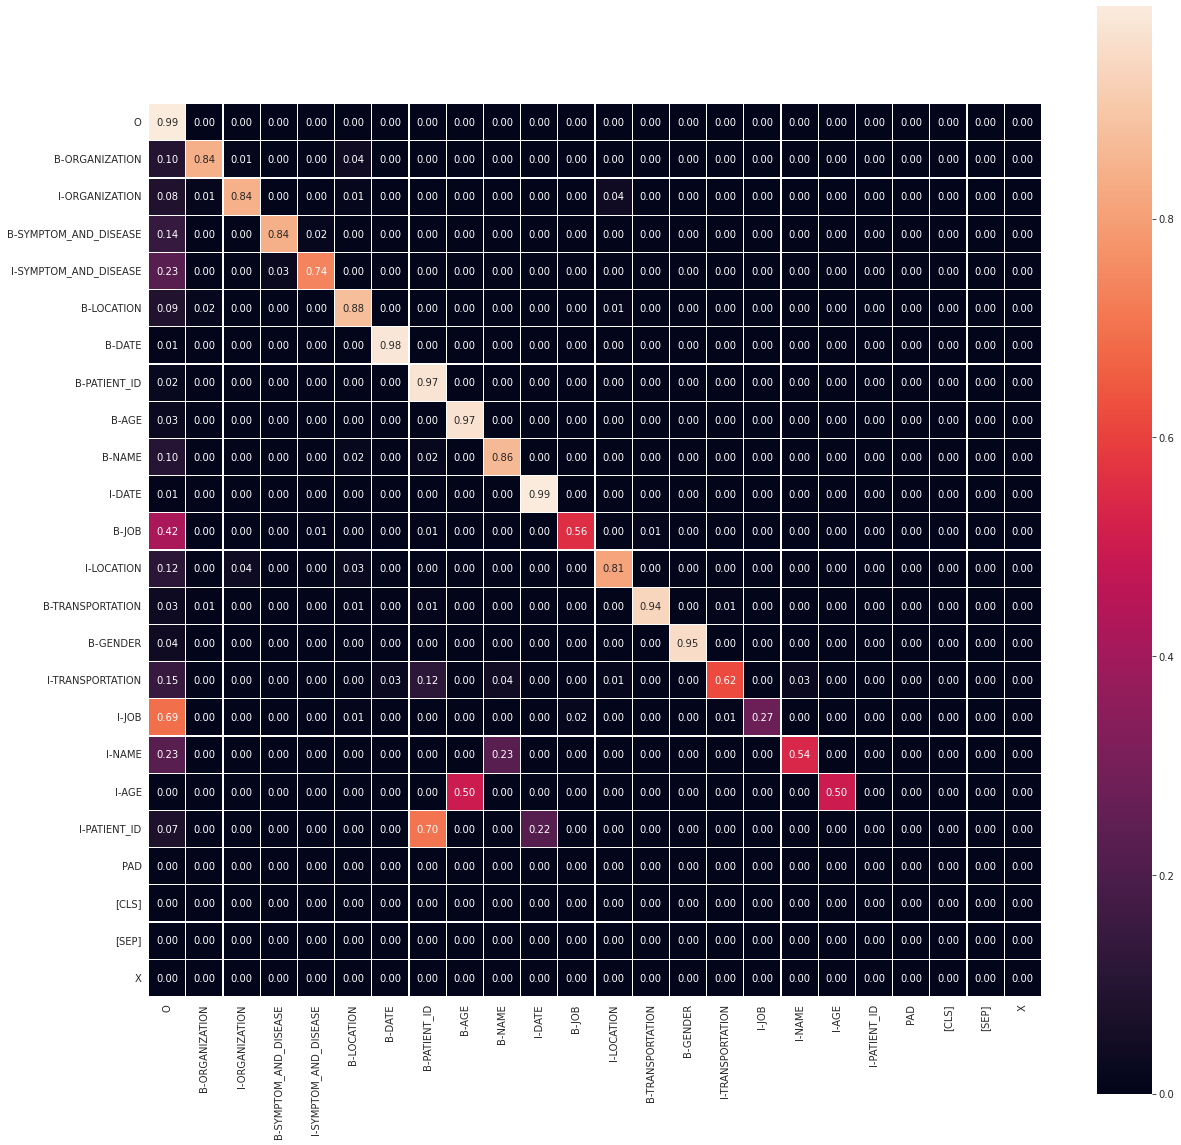

In [104]:
import seaborn as sns; 
# ax = sns.heatmap(corr, annot=True, fmt="d",linewidths=1)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, annot=True, fmt = '.2f', linewidths=0.1, square=True,
                     xticklabels=[ids_to_labels[i] for i in range(24)],
                     yticklabels=[ids_to_labels[i] for i in range(24)])